In [13]:
library(ggplot2)

In [3]:
# source files
src_files <- list.files('../../relapse_prediction/R', full.names = TRUE)
for (f in src_files) {
  source(f)
  cat(sprintf('Sourced file: %s\n', f))
}
source('../R/simulate.R')

Sourced file: ../../relapse_prediction/R/batch.R
Sourced file: ../../relapse_prediction/R/calc.R
Sourced file: ../../relapse_prediction/R/gpca.R
Sourced file: ../../relapse_prediction/R/misc.R
Sourced file: ../../relapse_prediction/R/normalise.R
Sourced file: ../../relapse_prediction/R/plot.R
Sourced file: ../../relapse_prediction/R/predict.R
Sourced file: ../../relapse_prediction/R/rvp.R
Sourced file: ../../relapse_prediction/R/subset.R
Sourced file: ../../relapse_prediction/R/utils.R


# Simulate microarray
- Delta: Max - 1

In [193]:
npercond <- c(20, 20, 20, 20)
crosstab <- matrix(npercond, 2, 2)

for (delta in seq(0.2, 1.2, 0.1)) {
  print(delta)
  simdata <- simulate_microarray(
    8000, sum(npercond), crosstab,
    delta = delta, phi = 0.1, zeta = 1.5,
    dropout = FALSE
  )

  file1 <- sprintf('../data/simulated/small/balanced/bal-%.1f.pdf', delta)
  write.table(simdata$X, file1, quote = FALSE, sep = '\t', row.names = F)

  ax_pca <- ggplot_pca(simdata$X, simdata$metadata, col = 'batch', pch = 'class')
  file2 <- sprintf('~/Dropbox/tmp/pca_bal-%.1f.pdf', delta)
  ggsave(file2, ax_pca, width = 6, height = 4)

  ax_top_pc <- ggplot_top_pc(
    simdata$X, simdata$metadata,
    x_axis = 'batch', col = 'batch', pch = 'class'
  )
  file3 <- sprintf('~/Dropbox/tmp/top_pc_bal-%.1f.pdf', delta)
  ggsave(file3, ax_top_pc, width = 6, height = 4)

  file4 <- sprintf('~/Dropbox/tmp/log_beta_bal-%.1f.pdf', delta)
  pdf(file4, width = 6, height = 4)
  hist(simdata$log_beta[, 1])
  dev.off()
}

[1] 0.2
[1] 0.3
[1] 0.4
[1] 0.5
[1] 0.6
[1] 0.7
[1] 0.8
[1] 0.9
[1] 1
[1] 1.1
[1] 1.2


In [180]:
# file <- sprintf('../data/simulated/small/balanced/bal-%d.pdf', 0)
# write.table(simdata$Z, file, quote = FALSE, sep = '\t', row.names = FALSE)

In [194]:
npercond <- c(10, 30, 30, 10)
crosstab <- matrix(npercond, 2, 2)

for (delta in seq(0.2, 1.2, 0.1)) {
  print(delta)
  simdata <- simulate_microarray(
    8000, sum(npercond), crosstab,
    delta = delta, phi = 0.1, zeta = 1.5,
    dropout = FALSE
  )

  file1 <- sprintf('../data/simulated/small/imbalanced/imbal-%.1f.pdf', delta)
  write.table(simdata$X, file1, quote = FALSE, sep = '\t', row.names = F)

  ax_pca <- ggplot_pca(simdata$X, simdata$metadata, col = 'batch', pch = 'class')
  file2 <- sprintf('~/Dropbox/tmp/pca_imbal-%.1f.pdf', delta)
  ggsave(file2, ax_pca, width = 6, height = 4)

  ax_top_pc <- ggplot_top_pc(
    simdata$X, simdata$metadata,
    x_axis = 'batch', col = 'batch', pch = 'class'
  )
  file3 <- sprintf('~/Dropbox/tmp/top_pc_imbal-%.1f.pdf', delta)
  ggsave(file3, ax_top_pc, width = 6, height = 4)

  file4 <- sprintf('~/Dropbox/tmp/log_beta_imbal-%.1f.pdf', delta)
  pdf(file4, width = 6, height = 4)
  hist(simdata$log_beta[, 1])
  dev.off()
}

[1] 0.2
[1] 0.3
[1] 0.4
[1] 0.5
[1] 0.6
[1] 0.7
[1] 0.8
[1] 0.9
[1] 1
[1] 1.1
[1] 1.2


In [ ]:
file <- sprintf('../data/simulated/small/imbalanced/imbal-%d.pdf', 0)
write.table(simdata$Z, file, quote = FALSE, sep = '\t', row.names = FALSE)

## Plots

In [6]:
dir <- '../data/simulated/small/balanced'
files <- list.files(dir, full.names = T)
files <- files[c(9, 1:8, 10:11)]
print(files)
list_data <- lapply(files, read.table, sep = "\t", header = T)

 [1] "../data/simulated/small/balanced/bal-0.pdf"  
 [2] "../data/simulated/small/balanced/bal-0.2.pdf"
 [3] "../data/simulated/small/balanced/bal-0.3.pdf"
 [4] "../data/simulated/small/balanced/bal-0.4.pdf"
 [5] "../data/simulated/small/balanced/bal-0.5.pdf"
 [6] "../data/simulated/small/balanced/bal-0.6.pdf"
 [7] "../data/simulated/small/balanced/bal-0.7.pdf"
 [8] "../data/simulated/small/balanced/bal-0.8.pdf"
 [9] "../data/simulated/small/balanced/bal-0.9.pdf"
[10] "../data/simulated/small/balanced/bal-1.0.pdf"
[11] "../data/simulated/small/balanced/bal-1.1.pdf"


In [14]:
ids <- sapply(files, function(x) substring(x, 34), USE.NAMES = F)
print(ids)
names(list_data) <- ids

 [1] "bal-0.pdf"   "bal-0.2.pdf" "bal-0.3.pdf" "bal-0.4.pdf" "bal-0.5.pdf"
 [6] "bal-0.6.pdf" "bal-0.7.pdf" "bal-0.8.pdf" "bal-0.9.pdf" "bal-1.0.pdf"
[11] "bal-1.1.pdf"


In [15]:
# metadata
ncond <- 20
batch <- as.factor(rep(1:2, each = ncond * 2))
class <- rep(rep(LETTERS[1:2], each = ncond), 2)
metadata <- data.frame(batch, class, row.names = colnames(list_data[[1]]))

In [16]:
print(names(list_data))
X <- list_data[[2]]

 [1] "bal-0.pdf"   "bal-0.2.pdf" "bal-0.3.pdf" "bal-0.4.pdf" "bal-0.5.pdf"
 [6] "bal-0.6.pdf" "bal-0.7.pdf" "bal-0.8.pdf" "bal-0.9.pdf" "bal-1.0.pdf"
[11] "bal-1.1.pdf"


### PCA

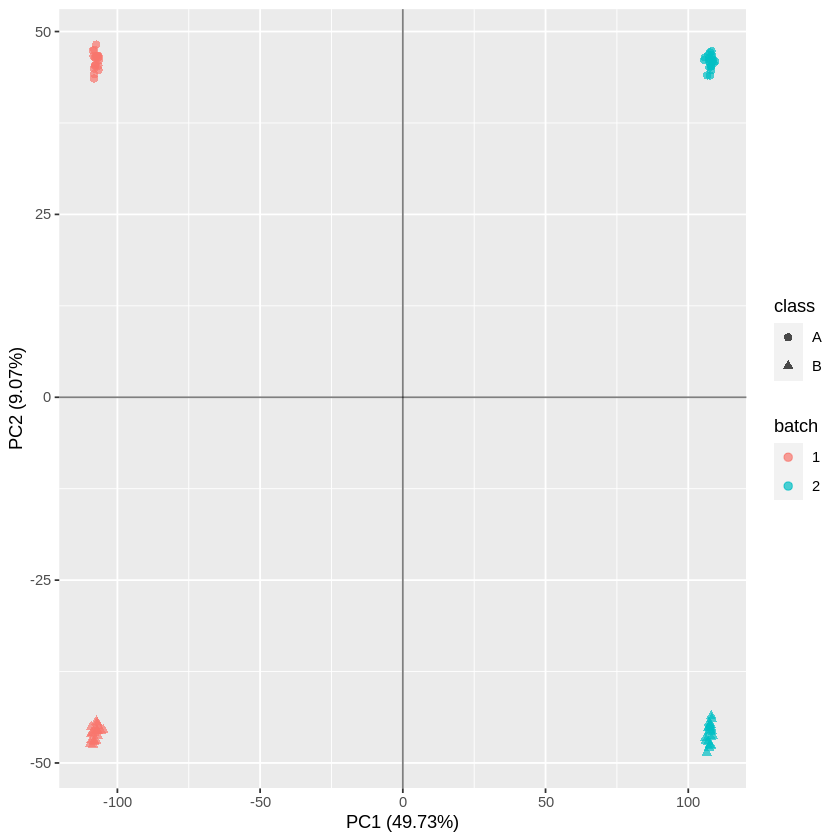

In [161]:
ax_pca <- ggplot_pca(simdata$X, simdata$metadata, col = 'batch', pch = 'class')

### Feature

In [127]:
npercond <- c(10, 30, 30, 10)
crosstab <- matrix(npercond, 2, 2)
delta <- 2
simdata <- simulate_microarray(
  8000, sum(npercond), crosstab,
  delta = delta, gamma = 0.5,
  phi = 0.1, zeta = 1.5,
  dropout = FALSE
)

In [128]:
Z <- list_data[[1]]
alpha <- list_data[[2]] - Z

In [129]:
i <- 0

Warning message:
“Removed 80 rows containing missing values (`geom_point()`).”


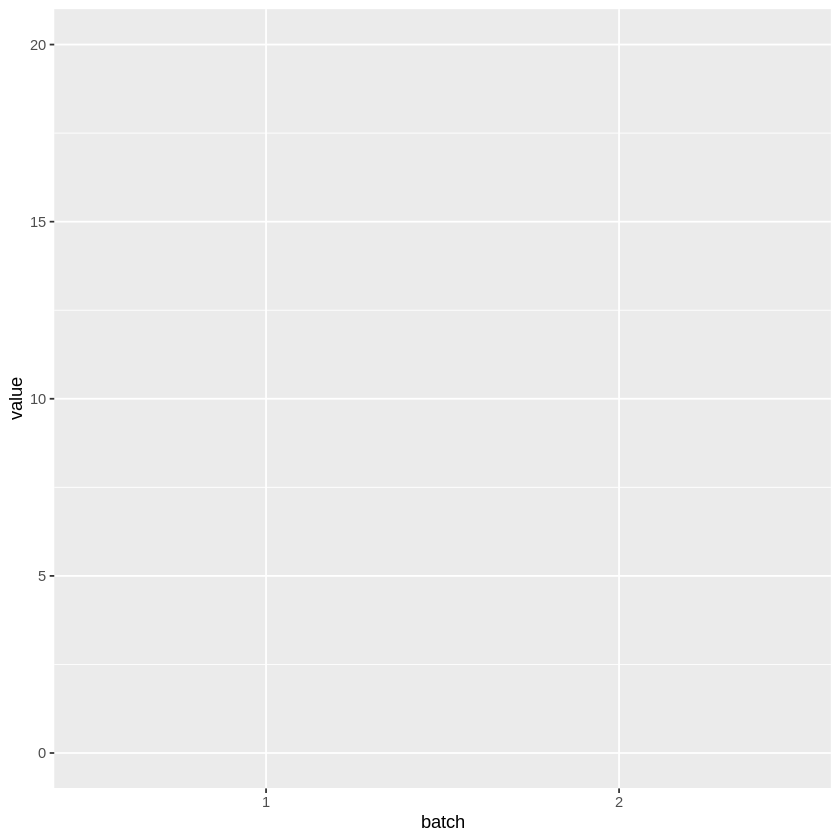

In [134]:
i <- i + 1
feature <- data.frame(
  value = as.vector(data.matrix(simdata$alpha[i, ])),
  batch = metadata$batch,
  class = metadata$class
)

ggplot(feature) +
  geom_point(
    aes(x = batch, y = value, pch = class, col = batch),
    position = position_jitterdodge(jitter.width = .5),
    show.legend = FALSE
  ) +
  ylim(0, 20)

#### Histogram

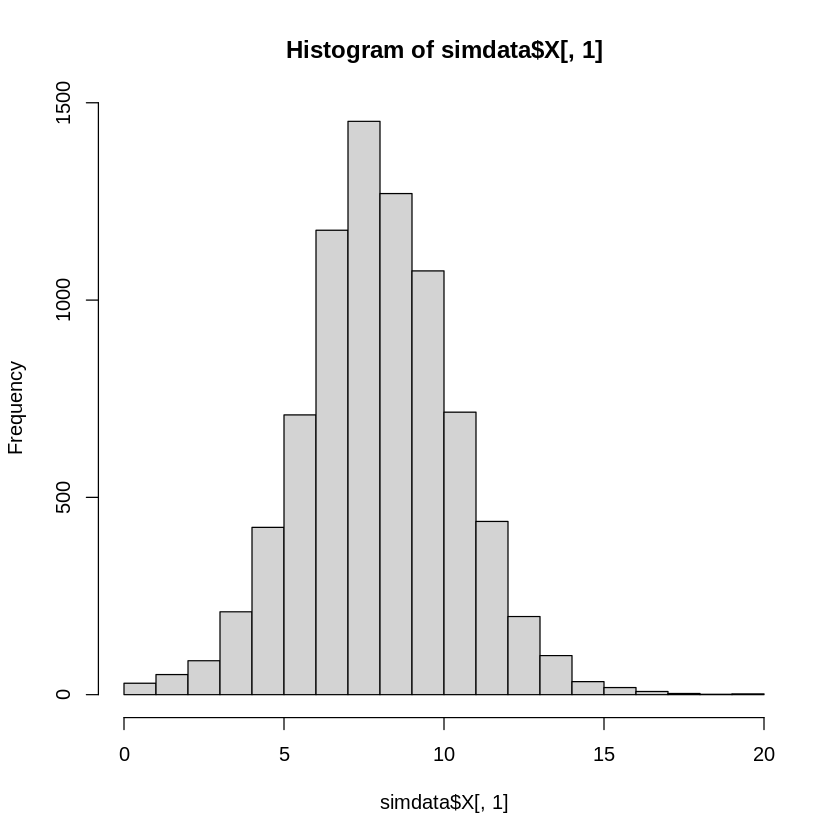

In [196]:
hist(simdata$X[, 1])

#### Simulation distributions

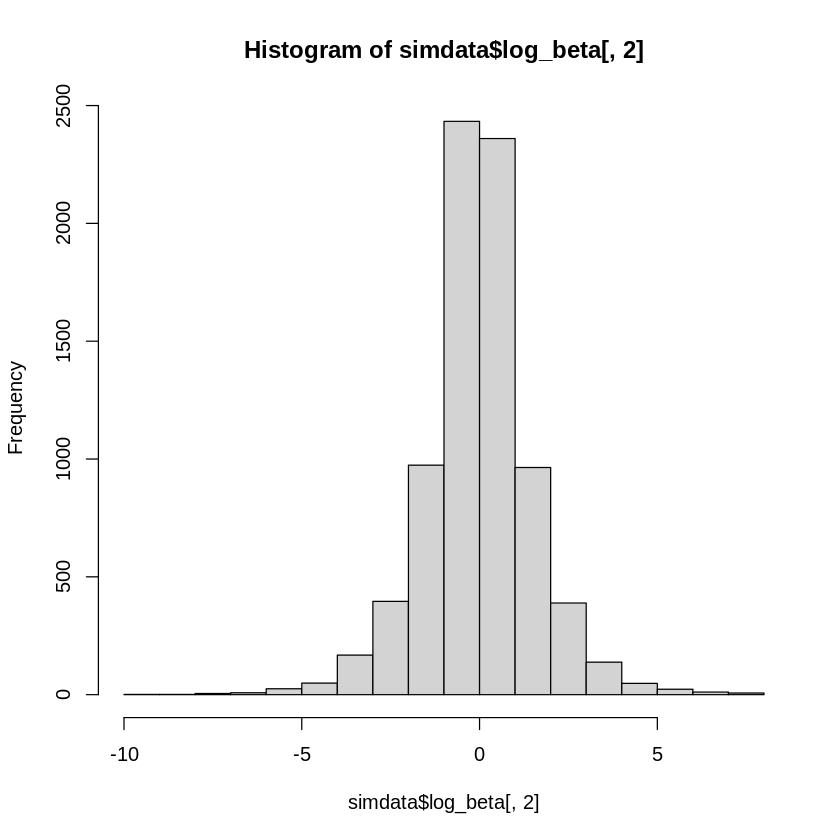

In [174]:
hist(simdata$log_beta[, 1])